# Classification - Count - BoW

This notebook discusses Multi-label classification methods for the [academia.stackexchange.com](https://academia.stackexchange.com/) data dump in BoW representation.

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Methods](#methods)
* [Evaluation](#evaluation)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load
from pathlib import Path
from academia_tag_recommender.definitions import MODELS_PATH
from academia_tag_recommender.classifier import Classifier, available_classifier_paths

DATA_FOLDER = Path(MODELS_PATH) / 'classifier' / 'multi-label'
RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.data import documents
from academia_tag_recommender.test_train_data import get_y, get_test_train_data

from academia_tag_recommender.test_train_data import get_X_reduced, get_y, get_test_train_data
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition

preprocessing = PreprocessingDefinition('count', 'basic', 'basic', 'english', '1,1', 'TruncatedSVD')
X_train, X_test, y_train, y_test = get_test_train_data(get_X_reduced(preprocessing), get_y())
print('Train set with shape ', X_train.shape)
print('Test set with shape', X_test.shape)

Train set with shape  (24812, 5993)
Test set with shape (8270, 5993)


<a id='data_preparation'/>

## Data Preparation

In [3]:
from academia_tag_recommender.preprocessing_definition import PreprocessingDefinition
paths = available_classifier_paths('count')

def create_classifier(classifier, name):
    path = [path for path in paths if name in path.name]
    if len(path) > 0:
        clf = load(path[0])
    else:
        clf = Classifier(classifier, preprocessing, name)
        clf.fit(X_train, y_train)
        clf.score(X_test, y_test)
        clf.save('count')
    print('Training: {}s'.format(clf.training_time))
    print('Test: {}s'.format(clf.test_time))
    clf.evaluation.print_stats()

<a id='methods'/>

## Methods

* [Problem Transformation](#problem_transformation)
* [Algorithm Adaption](#algorithm_adaption)
* [Ensembles](#ensembles)

<a id='problem_transformation'/>

### Problem Transformation

- [DecisionTreeClassifier](#decisiontree)
- [KNeighborsClassifier](#kNN)
- [MLPClassifier](#mlp)
- [MultioutputClassifier](#multioutput)
- [Classifier Chain](#chain)
- [Label Powerset](#label_powerset)

<a id='decisiontree'/>

**DecisionTreeClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [4]:
from sklearn.tree import DecisionTreeClassifier

create_classifier(DecisionTreeClassifier(random_state=RANDOM_STATE), 'DecisionTreeClassifier')

Training: 5266.834919691086s
Test: 1.417691707611084s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.022345828295042322     0.00592503022974607      0.18107214832728735      0.17447601773478436      0.16301999961613023      
micro                                                            0.17079173438588344      0.17570343476806954      0.1732127719694829       
macro                                                            0.06287611313083953      0.06384628033052021      0.06305556008924315      


<a id='kNN'/>

**KNeighborsClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

create_classifier(KNeighborsClassifier(), 'KNeighborsClassifier')

Training: 55.85425567626953s
Test: 2163.389015674591s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.013531470756698276     0.03966142684401451      0.04510278113663845      0.018641676743248688     0.02525018713652329      
micro                                                            0.3558282208588957       0.019395213299574835     0.03678535834012866      
macro                                                            0.21056831548261604      0.011287453612868334     0.019941483252599666     


<a id='mlp'/>

**MLPClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [6]:
from sklearn.neural_network import MLPClassifier

create_classifier(MLPClassifier(random_state=RANDOM_STATE), 'MLPClassifier')

Training: 630.0502800941467s
Test: 0.41588830947875977s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015640552408833452     0.042805320435308346     0.33663926796030785      0.2680068520757759       0.27391295926967024      
micro                                                            0.37711664305471226      0.26704246882912147      0.3126747958384607       
macro                                                            0.38144357539530965      0.16972035843478256      0.22240061856892024      


<a id='multioutput'/>

**MultioutputClassifier** [source](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html#sklearn.multioutput.MultiOutputClassifier)

MultiouputClassifier transforms sklearn classifier into classifiers capable of Binary Relevence.

In [7]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

create_classifier(MultiOutputClassifier(LinearSVC(random_state=RANDOM_STATE)), 'MultioutputClassifier(LinearSVC)')

Training: 2682.9986662864685s
Test: 24.432773113250732s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.024478457328326864     0.028899637243047158     0.2868276414339396       0.34042926239419585      0.27275712338382224      
micro                                                            0.22487287337560424      0.3422347489609707       0.271409899414673        
macro                                                            0.2537482323534035       0.2533429184011215       0.2407321250035779       


In [8]:
from sklearn.linear_model import LogisticRegression

create_classifier(MultiOutputClassifier(LogisticRegression(random_state=RANDOM_STATE)), 'MultioutputClassifier(LogisticRegression)')

Training: 1035.183795452118s
Test: 16.107332706451416s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015103417552345191     0.05102781136638452      0.32493920898394896      0.236062071745264        0.24803884010655478      
micro                                                            0.3902783222265778       0.23780633449577224      0.29553550225599623      
macro                                                            0.4438354737157235       0.1447076161060097       0.20372966630136838      


<a id='chain'/>

**Classifier Chain** [source](http://scikit.ml/api/skmultilearn.problem_transform.cc.html#skmultilearn.problem_transform.ClassifierChain)

<cite>[Read et al., 2011][1]</cite>

[1]: https://doi.org/10.1007/s10994-011-5256-5

In [9]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import LinearSVC

create_classifier(ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)), 'ClassifierChain(LinearSVC)')

Training: 2932.4265146255493s
Test: 85.04298782348633s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.02145993763126074      0.02962515114873035      0.2897575818645952       0.3170092704554615       0.2729536755839817       
micro                                                            0.2548974506421315       0.31763244637653465      0.2828278531626186       
macro                                                            0.2968020283385027       0.2342973135136452       0.2477906691548305       


In [10]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
create_classifier(ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'ClassifierChain(LogisticRegression)')

Training: 1385.7611727714539s
Test: 83.88598012924194s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014985044230891618     0.052357920193470374     0.32612934492620105      0.2347843611446997       0.2498402839938511       
micro                                                            0.39532088774937907      0.23570439019729614      0.29532531274316154      
macro                                                            0.4475082177022539       0.1396158810284676       0.1983386281886934       


<a id='label_powerset'/>

**Label Powerset** [source](http://scikit.ml/api/skmultilearn.problem_transform.lp.html#skmultilearn.problem_transform.LabelPowerset)

In [ ]:
from skmultilearn.problem_transform import LabelPowerset

#create_classifier(LabelPowerset(classifier=LinearSVC(random_state=RANDOM_STATE)), 'LabelPowerset(LinearSVC)')

In [ ]:
# Does not finish
#create_classifier(LabelPowerset(classifier=LogisticRegression(random_state=RANDOM_STATE)), 'LabelPowerset(LogisticRegression)')

<a id='Algorithm Adaption'/>

### Algorithm Adaption

- [MLkNN](#mlknn)
- [MLARAM](#mlaram)

<a id='mlknn'/>

**MLkNN** [source](http://scikit.ml/api/skmultilearn.adapt.mlknn.html#multilabel-k-nearest-neighbours)

> Firstly, for each test instance, its k nearest neighbors in the training set are identified. Then, according to statistical information gained from the label sets of these neighboring instances, i.e. the number of neighboring instances belonging to each possible class, maximum a posteriori (MAP) principle is utilized to determine the label set for the test instance.
<cite>[Zhang & Zhou, 2007][1]</cite>

[1]: https://doi.org/10.1016/j.patcog.2006.12.019

In [11]:
from skmultilearn.adapt import MLkNN

create_classifier(MLkNN(), 'MLkNN')

Training: 6447.56178188324s
Test: 2104.59516453743s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015879844714567555     0.028415961305925032     0.11791750638183529      0.07251713018943973      0.08154855691131385      
micro                                                            0.21264121264121263      0.07103616299622606      0.10649573873809355      
macro                                                            0.21573138684439408      0.04972934044454011      0.07049804172769387      


<a id='mlaram'/>

**MLARAM** [source](http://scikit.ml/api/skmultilearn.adapt.mlaram.html#skmultilearn.adapt.MLARAM)

> an extension of fuzzy Adaptive Resonance Associative Map (ARAM) – an Adaptive Resonance Theory (ART)based neural network. It aims at speeding up the classification process in the presence of very large data.
<cite>[F. Benites & E. Sapozhnikova, 2015][7]</cite>

[7]: https://doi.org/10.1109/ICDMW.2015.14

In [12]:
from skmultilearn.adapt import MLARAM

create_classifier(MLARAM(), 'MLARAM')

Training: 47.86252975463867s
Test: 7066.428725242615s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.03397123401005537      0.0                      0.10766626360338573      0.20906086255542117      0.13710447016372052      
micro                                                            0.10766626360338573      0.21267854583671714      0.14296035836424065      
macro                                                            0.0028333227264048873    0.02631578947368421      0.00502130313556503      


<a id='ensembles'/>

### Ensembles

- [RAkELo](#rakelo)
- [RAkELd](#rakeld)
- [MajorityVotingClassifier](#majority_voting)
- [LabelSpacePartitioningClassifier](#label_space)

<a id='rakelo'/>

**RAkELo** [source](http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO)

> Rakel: randomly breaking the initial set of labels into a number of small-sized labelsets, and employing [Label powerset] to train a corresponding multilabel classifier.
<cite>[Tsoumakas et al., 2011][1]</cite>


> Divides the label space in to m subsets of size k, trains a Label Powerset classifier for each subset and assign a label to an instance if more than half of all classifiers (majority) from clusters that contain the label assigned the label to the instance.
<cite>[skmultilearn][2]</cite>


[1]: https://doi.org/10.1109/TKDE.2010.164
[2]: http://scikit.ml/api/skmultilearn.ensemble.rakelo.html#skmultilearn.ensemble.RakelO

In [13]:
from skmultilearn.ensemble import RakelO
from sklearn.svm import LinearSVC

create_classifier(RakelO(
    base_classifier=LinearSVC(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
), 'RakelO(LinearSVC)')

Training: 13181.042173624039s
Test: 142.57531356811523s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.02069560236746643      0.03482466747279323      0.3097978145268839       0.3187061668681983       0.27930135687650437      
micro                                                            0.267424120764413        0.3182057039124827       0.2906132065181824       
macro                                                            0.288955719926668        0.22407187244189036      0.2380710552858161       


In [14]:
from sklearn.linear_model import LogisticRegression

create_classifier(RakelO(
    base_classifier=LogisticRegression(random_state=RANDOM_STATE),
    model_count=y_train.shape[1]
), 'RakelO(LogisticRegression)')

Training: 4207.186076641083s
Test: 148.82803225517273s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015648189397314327     0.047521160822249095     0.33051093069230914      0.25121120515920997      0.2583544363172696       
micro                                                            0.3713481168602605       0.25199445851048585      0.30024474927428996      
macro                                                            0.42616821291279344      0.15610213268619277      0.21331128160175916      


<a id='rakeld'/>

**RAkELd** [source](http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD)

>Divides the label space in to equal partitions of size k, trains a Label Powerset classifier per partition and predicts by summing the result of all trained classifiers.
<cite>[skmultilearn][3]</cite>

[3]: http://scikit.ml/api/skmultilearn.ensemble.rakeld.html#skmultilearn.ensemble.RakelD

In [15]:
from skmultilearn.ensemble import RakelD

create_classifier(RakelD(base_classifier=LinearSVC(random_state=RANDOM_STATE)), 'RakelD(LinearSVC)')

Training: 4483.105749607086s
Test: 56.57900261878967s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.023340546044676384     0.029262394195888754     0.28972486192645786      0.3276864167674325       0.2712455451529126       
micro                                                            0.23356577076704352      0.3296230831701142       0.2734026745913819       
macro                                                            0.21547370292354442      0.24955755420578976      0.22470114694053633      


In [16]:
create_classifier(RakelD(base_classifier=LogisticRegression(random_state=RANDOM_STATE)), 'RakelD(LogisticRegression)')

Training: 1338.731064081192s
Test: 57.55628061294556s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.016467256411888245     0.04607013301088271      0.32657759847300355      0.2621624345022169       0.26245495243140504      
micro                                                            0.3455818022747157       0.26417618114938135      0.2994449708948152       
macro                                                            0.39214779249131265      0.1640372529987706       0.21665522507943405      


***Clustering***

In [17]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from academia_tag_recommender.test_train_data import get_all_labels

def get_graph_builder():
    graph_builder = LabelCooccurrenceGraphBuilder(weighted=True, include_self_edges=False)
    label_names = get_all_labels()
    edge_map = graph_builder.transform(y_train)
    print("{} labels, {} edges".format(len(label_names), len(edge_map)))
    return graph_builder

In [18]:
from skmultilearn.cluster import IGraphLabelGraphClusterer
import igraph as ig

def get_clusterer():
    graph_builder = get_graph_builder()
    clusterer_igraph = IGraphLabelGraphClusterer(graph_builder=graph_builder, method='walktrap')
    partition = clusterer_igraph.fit_predict(X_train, y_train)
    return clusterer_igraph

In [19]:
clusterer_igraph = get_clusterer()

190 labels, 7741 edges


<a id='majority_vorting'/>

**MajorityVotingClassifier** [source](http://scikit.ml/api/skmultilearn.ensemble.voting.html#skmultilearn.ensemble.MajorityVotingClassifier)

In [ ]:
from skmultilearn.ensemble.voting import MajorityVotingClassifier
from skmultilearn.problem_transform import ClassifierChain

create_classifier(MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
), 'MajorityVotingClassifier(ClassifierChain(LogisticRegression))')

In [ ]:
create_classifier(MajorityVotingClassifier(
    classifier=ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
    clusterer=clusterer_igraph
), 'MajorityVotingClassifier(ClassifierChain(LinearSVC))')

<a id='label_space'/>

**LabelSpacePartitioningClassifier** [source](http://scikit.ml/api/skmultilearn.ensemble.partition.html#skmultilearn.ensemble.LabelSpacePartitioningClassifier)

<cite>[Szymański et al., 2016][2]</cite>

[2]: https://doi.org/10.3390/e18080282

In [22]:
from skmultilearn.ensemble import LabelSpacePartitioningClassifier

create_classifier(LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=LogisticRegression(random_state=RANDOM_STATE)),
    clusterer = clusterer_igraph
), 'LabelSpacePartitioningClassifier(ClassifierChain(LogisticRegression))')

Training: 4165.810604572296s
Test: 107.03660106658936s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.01592184815121237      0.04631197097944377      0.3153148691963686       0.23691455058444175      0.24547374229961894      
micro                                                            0.35506989285460866      0.23904839249032628      0.28573060012562096      
macro                                                            0.4152477257578905       0.1441189913298512       0.19889821977219732      


In [ ]:
# DNF
#create_classifier(LabelSpacePartitioningClassifier(
#    classifier = ClassifierChain(classifier=LinearSVC(random_state=RANDOM_STATE)),
#    clusterer = clusterer_igraph
#), 'LabelSpacePartitioningClassifier(ClassifierChain(LinearSVC))')

<a id='evaluation'/>

## Evaluation

In [24]:
paths = available_classifier_paths('count')

In [25]:
evals = []
for path in paths:
    if '-' not in path.name:
        clf = load(path)
        evaluation = clf.evaluation
        evals.append([str(clf), evaluation])

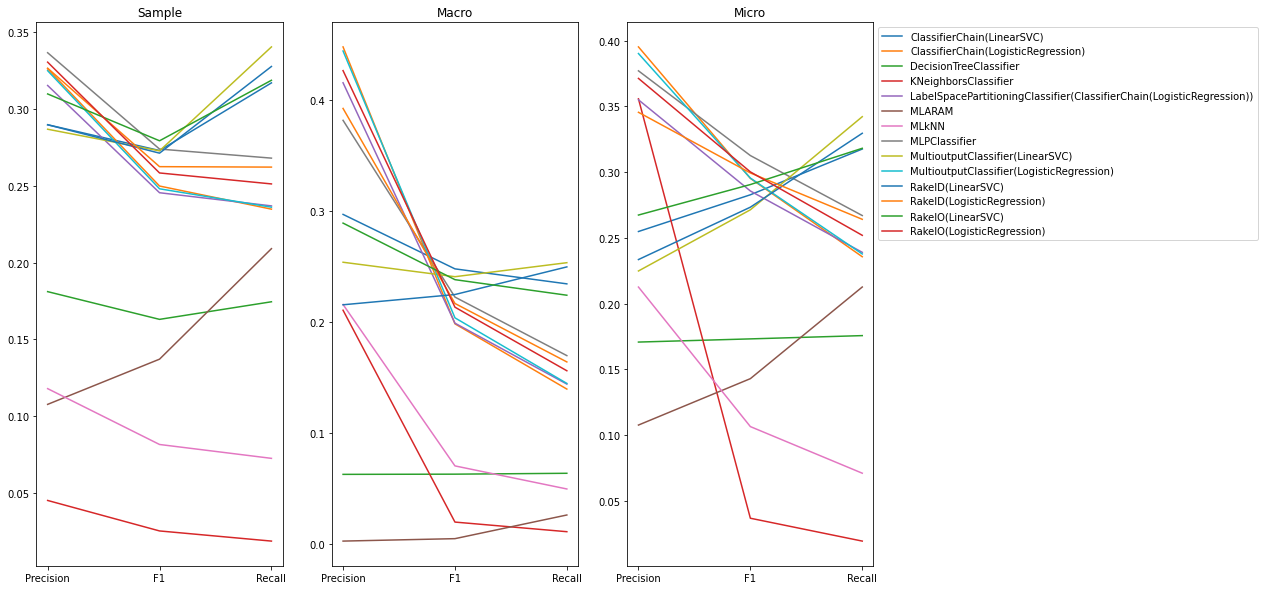

In [26]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [27]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.recall_macro, reverse=True)[:3]

In [28]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray()
    l = 1 - orig - prediction
    return np.average(l, axis=0)

In [29]:
from sklearn.metrics import classification_report
classwise_results = []
for clf_path in top_3:
    clf = load(clf_path)
    prediction = clf.predict(X_test)
    label_accuracies = per_label_accuracy(y_test, prediction)
    report = classification_report(y_test, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    classwise_results.append((clf, classwise_report))

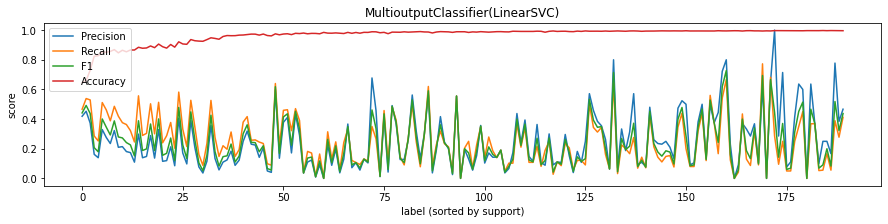

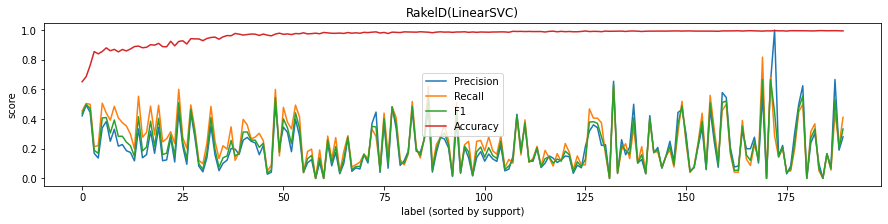

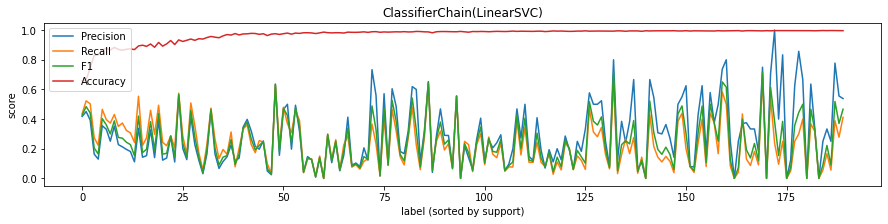

In [30]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.plot(x_, [results[result]['accuracy'] for result in sorted_results][0:len(x_)], label="Accuracy")
    fig_1.set_xlabel('label (sorted by support)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()